In [1]:
from pandas import DataFrame, Series

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import json

In [5]:
import pylab as pl

In [6]:
import matplotlib

In [7]:
%matplotlib inline

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
path = 'datas/usagov_bitly_data2013-05-17-1368828605.txt'

In [10]:
records = [json.loads(line) for line in open(path)]

In [11]:
records[0]['tz']

'Pacific/Auckland'

In [12]:
frame = DataFrame(records)

In [13]:
tz_counts = frame['tz'].value_counts()

In [14]:
clean_tz = frame['tz'].fillna('Missing')

In [15]:
clean_tz[clean_tz == ''] = 'Unknown'

In [16]:
tz_counts = clean_tz.value_counts()

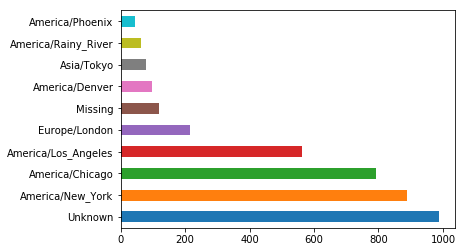

In [17]:
tz_counts[:10].plot(kind='barh',rot=0)

In [18]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [19]:
cframe = frame[frame.a.notnull()]

In [20]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [21]:
operating_system[:5]

array(['Not Windows', 'Windows', 'Not Windows', 'Windows', 'Not Windows'],
      dtype='<U11')

In [22]:
by_tz_os = cframe.groupby(['tz',operating_system])

In [23]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [24]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,840.0,149.0
Africa/Blantyre,0.0,1.0
Africa/Cairo,0.0,4.0
Africa/Casablanca,0.0,2.0
Africa/Ceuta,3.0,1.0
Africa/Gaborone,1.0,0.0
Africa/Johannesburg,0.0,2.0
Africa/Lagos,0.0,1.0
Africa/Nairobi,0.0,3.0


In [25]:
indexer = agg_counts.sum(1).argsort()

In [26]:
indexer[:10]

tz
                       120
Africa/Blantyre         27
Africa/Cairo           100
Africa/Casablanca       75
Africa/Ceuta            95
Africa/Gaborone         92
Africa/Johannesburg     91
Africa/Lagos            46
Africa/Nairobi          49
Africa/Tripoli          23
dtype: int64

In [27]:
count_subset = agg_counts.take(indexer)[-10:]

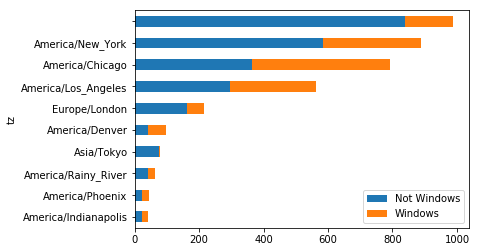

In [28]:
count_subset.plot(kind='barh',stacked=True)

In [29]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)

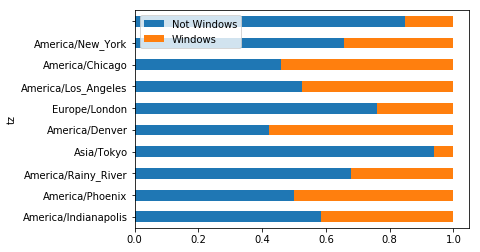

In [30]:
normed_subset.plot(kind='barh',stacked=True)